# **Laboratorio 10: Filtros en series de tiempo**
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2440 Programación científica**

**Nombres de los integrantes**


1.   David Tobón Molina
2.   David Santiago Rodríguez

**Número del grupo**

Grupo 2

# **Contexto del problema**
El cerebro está activo en todo momento, es capaz de producir actividad de manera espontánea en forma de oscilaciones que pueden ser medidas utilizando distintos métodos, una de las técnicas más utilizadas es la electroencefalografía (EEG) que consiste en colocar electrodos en la superficie de la cabeza para detectar la actividad eléctrica producida por las neuronas.

<div>
<img src="https://cdn.shopify.com/s/files/1/2285/0379/articles/Electroencefalografia_Technomed_960x.png?v=1675279881" width="500"/>
</div>

La actividad cerebral se estima a una tasa contínua produciendo una serie temporal que puede ser analizada para diagnosticar enfermedades o investigar procesos básicos como el sueño. 

En la presente práctica haremos uso de un conjunto de **10 segundos** de datos obtenidos de un paciente en la fase inicial del sueño. Durante esta fase predominan las ondas alfa (6-10Hz, Hertz es la medida de oscilaciones por segundo). La señal inicial estará contaminada con oscilaciones de 60Hz que provienen de las conexiones con la línea eléctrica. El objetivo del presente laboratorio es utilizar el filtro de derivada para obtener una señal sin componentes de alta frecuencia. 

# **Descripción de la práctica**

El filtro de derivada se obtiene cuando se resuelve un problema de optimización de mínimos cuadrados con regularización ponderada:

\begin{align*}
\min_{x} ||y-x||^{2}_{2} + c||Dx||^{2}_{2}
\end{align*}

En este problema se busca encontrar el vector $x$ más parecido a $y$ con la restricción de tener cambios suaves en la señal de salida es decir, cuyos valores de energía de la derivada sean pequeños.

Al resolver analíticamente el anterior problema se obtiene la siguiente ecuación:
\begin{align*}
x = (I+cD^TD)^{-1} y_{}
\end{align*}

Donde: 
- $y$ es el vector de la señal sin filtrar,
- $x$ es el vector de la señal filtrada,
- $I$ es la matriz identidad (tamaño $m-1 \times m$), 
- $m$ es el tamaño de la señal, 
- $c$ es la constante de filtrado,
- $D$ es la matriz de regularización (tamaño $m-1 \times m$),

Note que $c$ pondera el valor de la energía de la derivada que se quiere minimizar; en este laboratorio entenderemos el efecto de $c$ sobre una señal con variaciones rápidas. 


1. Lea y procese los datos en formato *.mat* del documento "*data.mat*". Este archivo contiene los datos provenientes de un canal de electroencefalografía en milivoltios (mV). Grafique la serie de tiempo. Nota: Cree el vector de tiempo utilizando la función linspace.

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Apr 17 17:44:54 2023', '__version__': '1.0', '__globals__': [], 'EEG_O1': array([[ 74.0234375 , -10.15625   , -45.8984375 , ...,  35.9375    ,
        -48.33984375, -33.88671875]])}
dict_keys(['__header__', '__version__', '__globals__', 'EEG_O1'])
[ 74.0234375  -10.15625    -45.8984375  ...  35.9375     -48.33984375
 -33.88671875]
2561
<class 'numpy.ndarray'>


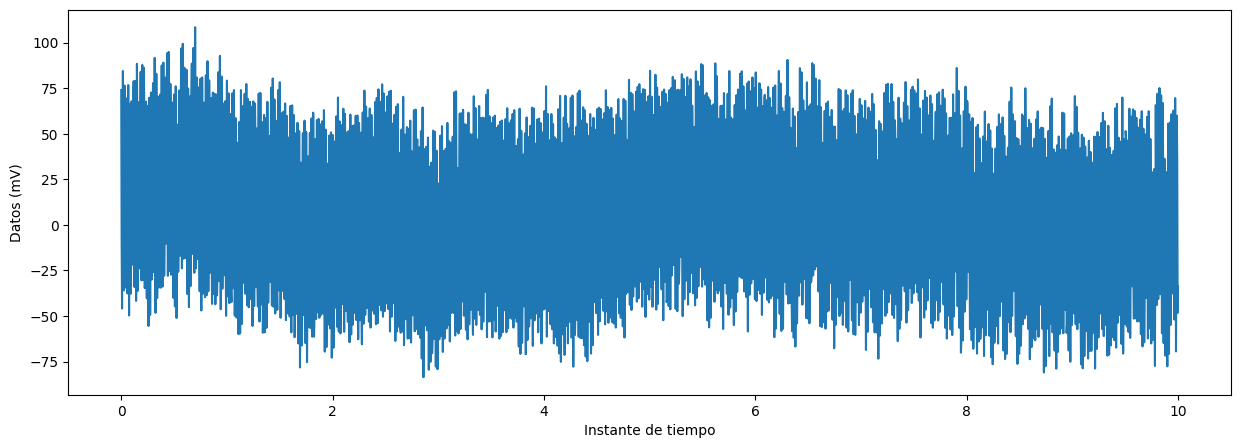

In [16]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

mat_data = loadmat('data.mat')
print(mat_data)
print(mat_data.keys())
data = mat_data['EEG_O1'][0]
print(data)
print(len(data))
print(type(data))

time_series = np.linspace(0, 10, len(data))
plt.figure(figsize=(15, 5))
plt.plot(time_series, data)
plt.title("Serie de tiempo de electroencefalografía")
plt.xlabel("Instante de tiempo")
plt.ylabel("Datos (mV)")
plt.show()

2. Cree una función que construya una matriz de regularización $D$ para una señal de tamaño $m$x$1$.

3. Realice una función que tenga como parámetros de entrada la señal sin filtrar y la constante de filtrado $c$ e implemente el proceso de filtrado descrito en la primera parte.



*3*. Implemente la función del punto anterior sobre la señal provista y utilice las siguientes constantes de filtrado:

 - $c_1$ = 10
 - $c_2$ = 100
 - $c_3$ = 1000


4. Realice una gráfica de cada una de las señales filtradas obtenidas, utilice distintos plots.

8. Responda las siguientes preguntas:
 - ¿Qué efecto tiene la constante de filtrado sobre la señal de salida?¿Es posible identificar algún tipo de actividad en la serie de tiempo original?
 - ¿En qué cuáles señales pueden identificar las oscilaciones alfa (6-10 Hz)? [Para esto cuente los picos de la señal que hay en un intervalo de 1 segundo]
 - ¿Existe algún $c$ para el que se pierda información relevante para el EEG?  